# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [3]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [1]:
df.count()

NameError: name 'df' is not defined

Answer:There are 400 observations in our UCLA Admissions dataset.

> ### Question 2.  Create a summary table.

In [5]:
df.describe().dropna()

C:\Users\janel\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

Answer: A GRE score can range from values 220 to 800, and applicants to UCLA can have GRE scores that vary moderately widely and can reach values in the hundreds. GPA has values that can only range from 0 to 4. Standard deviation can only be a value between 0 and 4.

> ### Question 4.  Drop data points with missing data.

In [6]:
df[pd.isnull(df).any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [7]:
df = df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [8]:
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Answer: Initially, the length of the dataset was 400. When checking for null values, I found that 3 observations have nulls in either column. When dropping NAs, I found that the dataset now has 3 less observations (397).

> ### Question 6.  Create boxplots for `gre` and `gpa`.

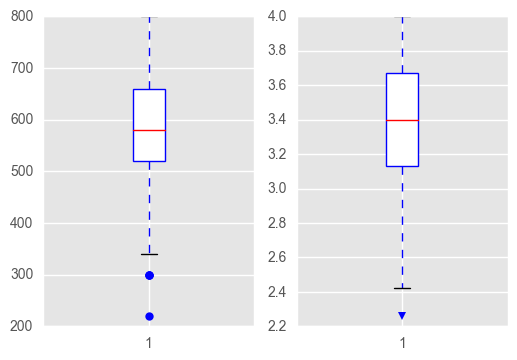

In [9]:
plt.subplot(1,2,1)
plt.boxplot(df['gre'],sym='o',patch_artist=True)
plt.subplot(1,2,2)
plt.boxplot(df['gpa'],sym='v',patch_artist=True);

> ### Question 7.  What do boxplots show?

Answer: A box plot shows the disrtibution of a dataset. Box plots show information similar to .describe(). The line in the middle of the box show the median of the dataset, also the second quartile. The lines at the ends of each whisker show the minimum and the maximum of the data. The top and bottom of the box are the 1st and 3rd quartiles. If the data were to be sorted and split into four equal parts, the box, also the interquartile range, holds the middle 50% of data.

> ### Question 8.  Plot the distribution of each variable.

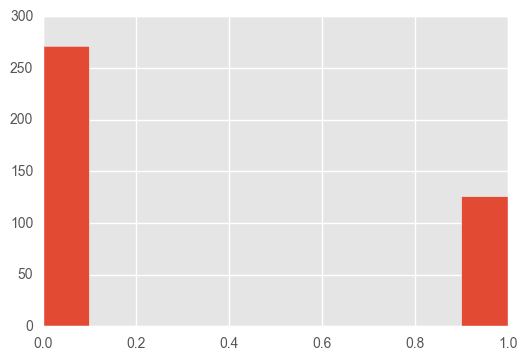

In [10]:
plt.hist(df['admit']);

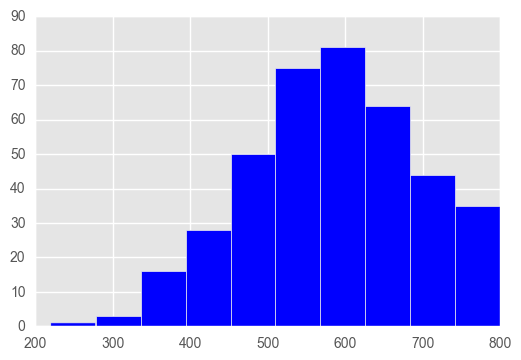

In [11]:
plt.hist(df['gre'],color='blue');

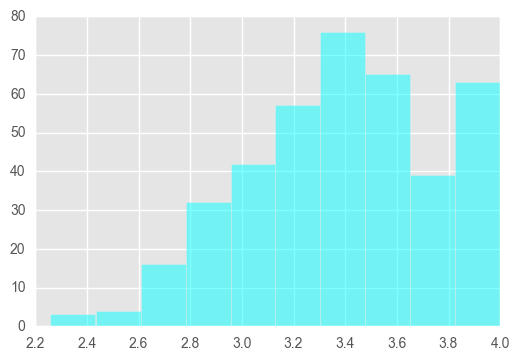

In [12]:
plt.hist(df['gpa'],color='cyan',alpha=0.5);

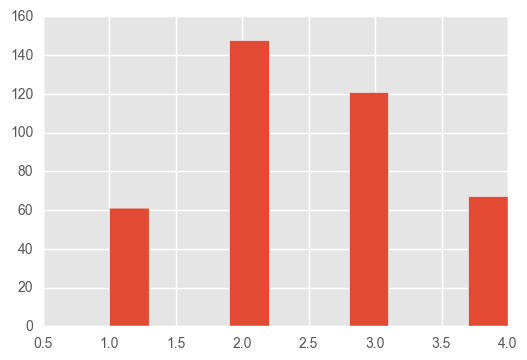

In [13]:
plt.hist(df['prestige']);

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: Based on our histograms we can see that GRE has a normal distribution with a rigt skew. GPA has a seemingly normal distribution, but a high frequency of applicants with a 4.0 GPA. The data is almost bimodal which could imply that a correction is needed.

> ### Question 10.  Create a correlation matrix for the dataset

In [16]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: Our variables do not seem to be highly correlated. The two most correlated variables are gre and gpa scores with an r of 0.3842408.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Prestige, although measured using integers, is a categorical variable. 1 means the highest prestige while 4 means the lowest prestige. In order to better visualize prestige, we can reassign the levels so that the lowest level of prestige starts at 1, although not necessary. We can look at each category of prestige and determine how many graduate school applicants were excepted.

> ### Question 13.  What is your hypothesis?

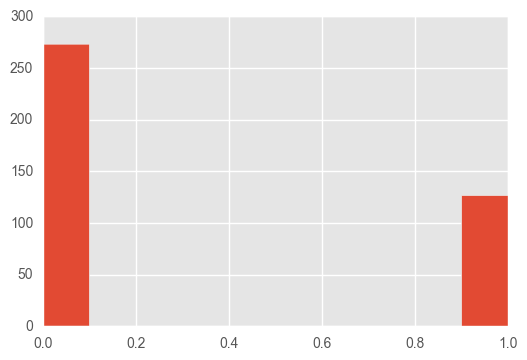

In [13]:
plt.hist(df['admit']);

Answer: Based on our data, there are more applicants from schools with prestige lower than the highest level (1). However, we can see that there are more rejections then acceptances to UCLA. Therefore, I cannot solely use the high distribution of lower-tier schools to make an assumption. Based on our correlation table, we can see that prestige is negatively correlated with all variables, therefore leading to the hypthesis that applicants from prestigious schools are more likely to have higher GPAs, higher GRE scores, and admittance to UCLA.